<a href="https://colab.research.google.com/github/sebasDev2001/AI-and-Data-Science-Journey/blob/main/Final_Proyecto_Model_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AI for Breast Cancer prediction using tensorflow and keras**

Images obtained from Paul Mooney via keggle: https://www.kaggle.com/paultimothymooney/breast-histopathology-images

The original dataset consisted of 162 whole mount slide images of Breast Cancer (BCa) specimens scanned at 40x. From that, 277,524 patches of size 50 x 50 were extracted (198,738 IDC negative and 78,786 IDC positive). Each patch’s file name is of the format: uxXyYclassC.png — > example 10253idx5x1351y1101class0.png . Where u is the patient ID (10253idx5), X is the x-coordinate of where this patch was cropped from, Y is the y-coordinate of where this patch was cropped from, and C indicates the class where 0 is non-IDC and 1 is IDC.



# Cargar Datos Entrenamiento


In [ ]:
from sklearn.datasets import load_files       
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D,MaxPooling2D, Dense, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
import os

from tdqm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from glob import glob # para recojer los datos mas facil

In [ ]:
def read_image(file_path, ROWS = 64,COLS = 64):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS))

def prep_data(images, ROWS = 64,COLS = 64,CHANNELS=3):
  count = len(images)
  data = np.ndarray((count, ROWS, COLS, CHANNELS))
  for i, image_file in enumerate(images):
    image = read_image(image_file,ROWS,COLS)
    data[i] = image   
  return data

In [ ]:
#!ls "/content/drive/MyDrive/S7-Inteligencia Artificial"
!ls "/content/drive/MyDrive/"

 7moSemestre		  Gatos_Perros.zip
 8voSemestre		  InformacionCOVID19.drawio
 Avion.jpg		 'Mastering Bitcoin by Andreas M. Antonopoulos.gdoc'
 Bus-U			  ModelosBuenos
'Cadena de valor'	  ModelosEntrega4
'Colab Notebooks'	  mushrooms.csv
 CuatroElementos.drawio  'Proyecto R'
 DataSet_Test.zip	  sample
 DataSet.zip		  SimioBBQ_DF.drawio
 FinalAnalisisYDiseño	  SimioBBQ_DF.pdf
 Final.drawio		  SistemasExpertos.drawio
 FinalMyS.drawio	  Team-4480-Code-2018-master


In [ ]:
#!unzip "/content/drive/MyDrive/DataSet.zip"

In [ ]:
PATH="/content/DataSet"
os.listdir(f'{PATH}/Train')

['9290_idx5_x501_y1351_class0.png',
 '10303_idx5_x1951_y1451_class1.png',
 '9320_idx5_x3001_y2751_class0.png',
 '9256_idx5_x2601_y1501_class1.png',
 '14153_idx5_x551_y1401_class1.png',
 '9321_idx5_x1851_y1601_class0.png',
 '9256_idx5_x1151_y1451_class0.png',
 '9320_idx5_x3251_y2401_class0.png',
 '8864_idx5_x2301_y2001_class1.png',
 '10302_idx5_x1701_y1401_class1.png',
 '14157_idx5_x1601_y1101_class1.png',
 '9256_idx5_x2751_y1301_class1.png',
 '9320_idx5_x301_y1951_class0.png',
 '14079_idx5_x1101_y1551_class1.png',
 '9265_idx5_x701_y1051_class0.png',
 '9255_idx5_x2651_y951_class1.png',
 '10306_idx5_x601_y1251_class1.png',
 '9323_idx5_x901_y851_class0.png',
 '14190_idx5_x2151_y1751_class1.png',
 '14155_idx5_x3601_y1351_class1.png',
 '9323_idx5_x501_y651_class0.png',
 '9260_idx5_x2651_y551_class0.png',
 '10308_idx5_x2351_y1201_class1.png',
 '8917_idx5_x251_y951_class0.png',
 '8863_idx5_x1801_y1301_class1.png',
 '14213_idx5_x1901_y1201_class1.png',
 '9319_idx5_x1501_y501_class0.png',
 '895

In [ ]:
imagePatchesNoCancer = glob('/content/DataSet/Train/*0.png', recursive=True)
imagePatchesConCancer = glob('/content/DataSet/Train/*1.png', recursive=True)
for filename in imagePatchesNoCancer[0:10]:
    print(filename)


/content/DataSet/Train/9290_idx5_x501_y1351_class0.png
/content/DataSet/Train/9320_idx5_x3001_y2751_class0.png
/content/DataSet/Train/9321_idx5_x1851_y1601_class0.png
/content/DataSet/Train/9256_idx5_x1151_y1451_class0.png
/content/DataSet/Train/9320_idx5_x3251_y2401_class0.png
/content/DataSet/Train/9320_idx5_x301_y1951_class0.png
/content/DataSet/Train/9265_idx5_x701_y1051_class0.png
/content/DataSet/Train/9323_idx5_x901_y851_class0.png
/content/DataSet/Train/9323_idx5_x501_y651_class0.png
/content/DataSet/Train/9260_idx5_x2651_y551_class0.png


In [ ]:
imagePatches = glob('/content/DataSet/Train/*.png', recursive=True)
# imagePatches

In [ ]:
# a = 0
# b = 0 
# while a < len(imagePatches):
  
#   if '0.png' in  imagePatches[a] and b <10000 :
#     b=b+1
#     del imagePatches[a]
#   a=a+1

In [ ]:
labels_train = np.array([(0 if '0.png' in fname else 1) for fname in imagePatches])
labels_train

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
np.unique(labels_train,return_counts=True)

(array([0, 1]), array([24762, 24276]))

In [ ]:
ROWS = 50
COLS = 50
CHANNELS = 3
train = prep_data(imagePatches,ROWS=ROWS,COLS=COLS)

In [ ]:
train=train/255.0 #normalizar

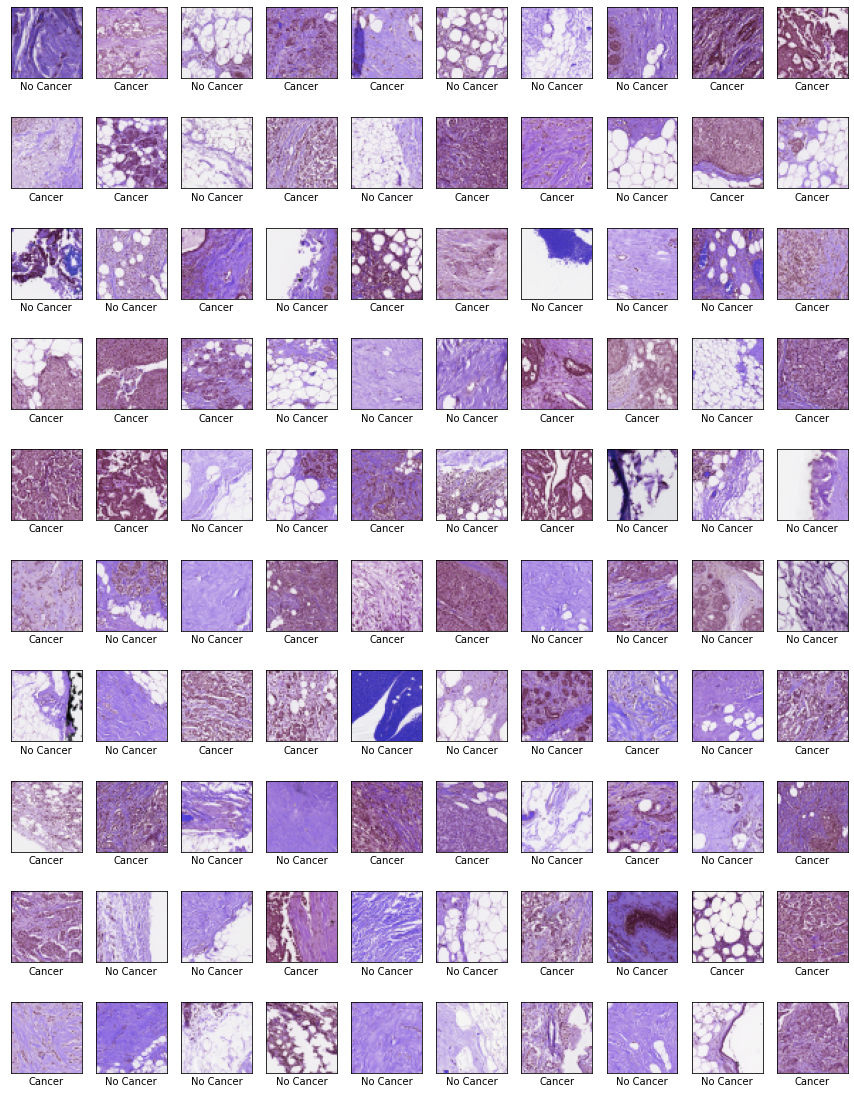

In [ ]:
plt.figure(figsize=(15,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train[i])
    plt.xlabel('No Cancer' if labels_train[i]==0 else 'Cancer')
plt.show()


# Cargar Datos Prueba


In [ ]:
#!unzip "/content/drive/MyDrive/DataSet_Test.zip"

In [ ]:
PATH="/content/DataSet_Test"
os.listdir(f'{PATH}/Test')

['16569_idx5_x851_y1251_class0.png',
 '16568_idx5_x2051_y1451_class0.png',
 '16570_idx5_x1451_y951_class1.png',
 '16896_idx5_x501_y401_class0.png',
 '16896_idx5_x901_y1201_class0.png',
 '16896_idx5_x251_y1051_class1.png',
 '16570_idx5_x1301_y1201_class0.png',
 '16896_idx5_x1801_y651_class0.png',
 '16568_idx5_x2201_y401_class0.png',
 '16568_idx5_x251_y1001_class0.png',
 '16570_idx5_x2101_y2201_class0.png',
 '16896_idx5_x1901_y2051_class0.png',
 '16570_idx5_x2601_y351_class1.png',
 '16568_idx5_x1701_y751_class1.png',
 '16569_idx5_x501_y951_class0.png',
 '16896_idx5_x501_y1351_class1.png',
 '16568_idx5_x1651_y1151_class0.png',
 '16568_idx5_x2401_y951_class0.png',
 '16570_idx5_x2001_y2101_class0.png',
 '16895_idx5_x1051_y951_class0.png',
 '16896_idx5_x1001_y1351_class1.png',
 '16569_idx5_x1_y1501_class0.png',
 '16569_idx5_x651_y151_class0.png',
 '16568_idx5_x1951_y501_class1.png',
 '16569_idx5_x601_y101_class0.png',
 '16896_idx5_x1001_y401_class0.png',
 '16896_idx5_x1301_y1701_class0.png',

In [ ]:
imagePatches_Test = glob('/content/DataSet_Test/Test/*.png', recursive=True)
imagePatches_Test

['/content/DataSet_Test/Test/16569_idx5_x851_y1251_class0.png',
 '/content/DataSet_Test/Test/16568_idx5_x2051_y1451_class0.png',
 '/content/DataSet_Test/Test/16570_idx5_x1451_y951_class1.png',
 '/content/DataSet_Test/Test/16896_idx5_x501_y401_class0.png',
 '/content/DataSet_Test/Test/16896_idx5_x901_y1201_class0.png',
 '/content/DataSet_Test/Test/16896_idx5_x251_y1051_class1.png',
 '/content/DataSet_Test/Test/16570_idx5_x1301_y1201_class0.png',
 '/content/DataSet_Test/Test/16896_idx5_x1801_y651_class0.png',
 '/content/DataSet_Test/Test/16568_idx5_x2201_y401_class0.png',
 '/content/DataSet_Test/Test/16568_idx5_x251_y1001_class0.png',
 '/content/DataSet_Test/Test/16570_idx5_x2101_y2201_class0.png',
 '/content/DataSet_Test/Test/16896_idx5_x1901_y2051_class0.png',
 '/content/DataSet_Test/Test/16570_idx5_x2601_y351_class1.png',
 '/content/DataSet_Test/Test/16568_idx5_x1701_y751_class1.png',
 '/content/DataSet_Test/Test/16569_idx5_x501_y951_class0.png',
 '/content/DataSet_Test/Test/16896_idx

In [ ]:
Y_test = np.array([(0 if '0.png' in fname else 1) for fname in imagePatches_Test])
Y_test

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
np.unique(Y_test,return_counts=True)

(array([0, 1]), array([2354, 1006]))

In [ ]:
ROWS = 50
COLS = 50
CHANNELS = 3
X_test = prep_data(imagePatches_Test,ROWS=ROWS,COLS=COLS)

In [ ]:
X_test=X_test/255.0 #nomralizar

In [ ]:
len(Y_test)

3360

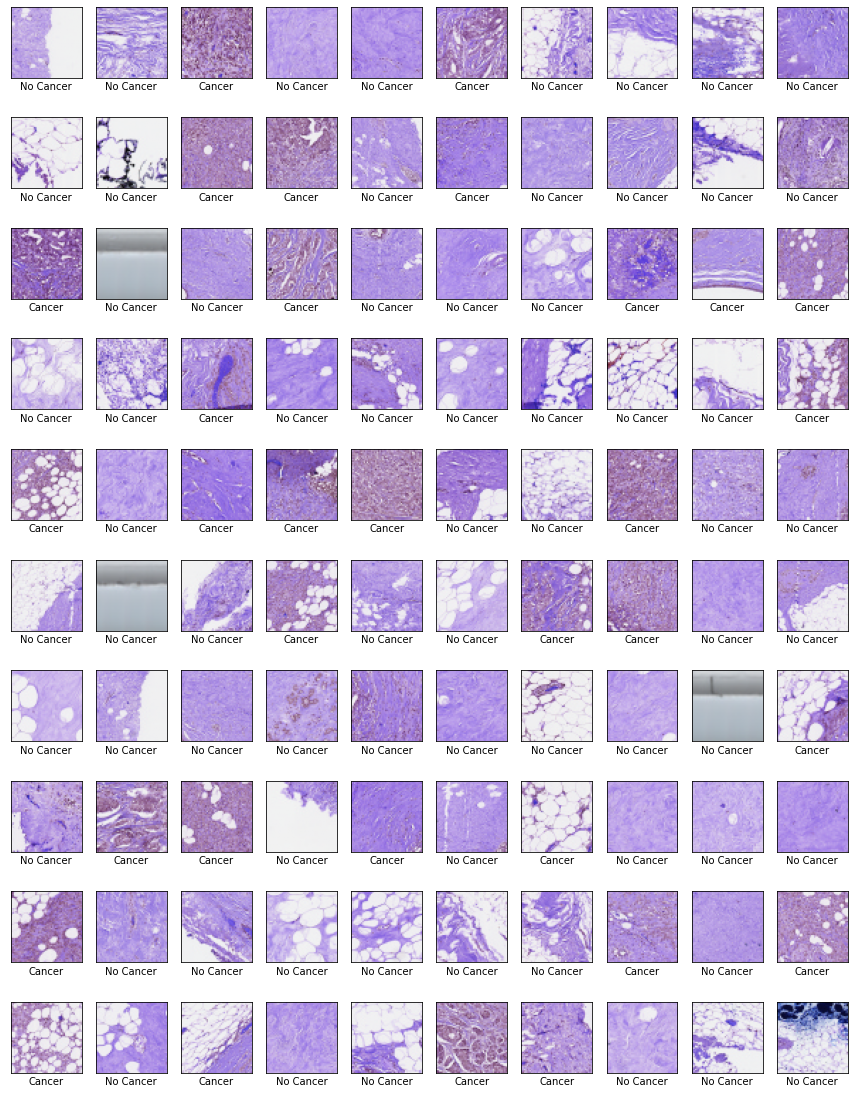

In [ ]:
plt.figure(figsize=(15,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel('No Cancer' if Y_test[i]==0 else 'Cancer')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train,labels_train, test_size=0.2, random_state=7, stratify=labels_train) #stratify es equitativo

#Modelo 

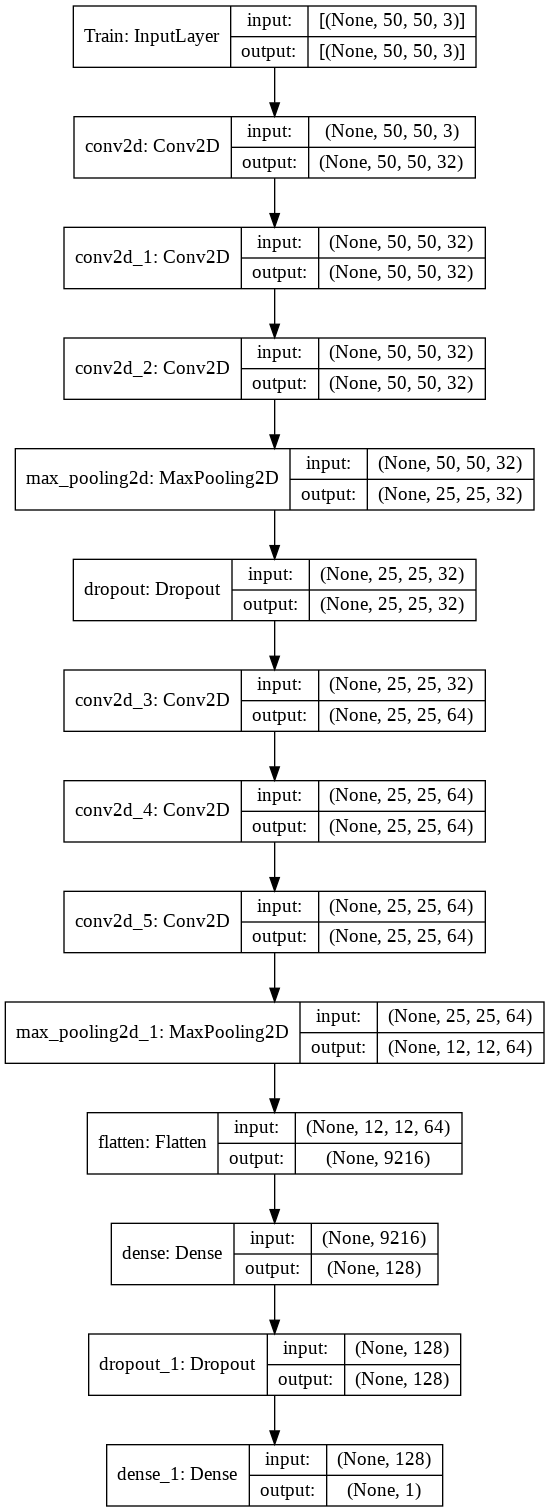

In [ ]:
# classifier = Sequential()

# classifier.add(Conv2D(32, (3, 3), input_shape = (50, 50, 3), activation = 'relu'))
# classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

# classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

# classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

# classifier.add(Flatten())

# classifier.add(Dense(units = 256, activation = 'relu'))
# classifier.add(Dropout(0.2))
# classifier.add(Dense(units = 1, activation = 'sigmoid'))




# train_input = keras.Input(shape=(50,50,3), name='Train')
# x1 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(train_input)
# x2 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(x1)
# x3 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(x2)
# x4 = layers.MaxPool2D(pool_size=(2,2))(x3)
# x5 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x4)
# x6 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x5)
# x7 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x6)
# x8 = layers.MaxPool2D(pool_size=(2,2))(x7)
# x9 = layers.Flatten()(x8)
# x10 = layers.Dense(128, activation='relu')(x9)
# x11 = layers.Dropout(0.2)(x10)
# pred = layers.Dense(1, activation='sigmoid', name='Sepsis_pred')(x11)
# classifier = keras.Model(inputs=train_input,outputs=pred)

# train_input = keras.Input(shape=(50,50,3), name='Train')
# x1 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(train_input)
# x2 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(x1)
# x3 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(x2)
# x4 = layers.MaxPool2D(pool_size=(2,2))(x3)
# x5 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x4)
# x6 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x5)
# x7 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x6)
# x8 = layers.MaxPool2D(pool_size=(2,2))(x7)
# x9 = layers.Conv2D(128,(3,3),padding="same",activation="relu")(x8)
# x10 = layers.Conv2D(128,(3,3),padding="same",activation="relu")(x9)
# x11 = layers.Conv2D(128,(3,3),padding="same",activation="relu")(x10)
# x12 = layers.Flatten()(x11)
# x13 = layers.Dense(128, activation='relu')(x12)
# x14 = layers.Dropout(0.2)(x13)
# pred = layers.Dense(1, activation='sigmoid', name='Sepsis_pred')(x14)
# classifier = keras.Model(inputs=train_input,outputs=pred)

train_input = keras.Input(shape=(50,50,3), name='Train')
x1 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(train_input)
x2 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(x1)
x3 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(x2)
x4 = layers.MaxPool2D(pool_size=(2,2))(x3)
x5 = layers.Dropout(0.3)(x4)
x6 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x5)
x7 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x6)
x8 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x7)
x9 = layers.MaxPool2D(pool_size=(2,2))(x8)
x10 = layers.Flatten()(x9)
x11 = layers.Dense(128, activation='relu')(x10)
x12 = layers.Dropout(0.5)(x11)
pred = layers.Dense(1, activation='sigmoid')(x12)
model = keras.Model(inputs=train_input,outputs=pred)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy','mse'])

In [ ]:
history=classifier.fit(X_train,Y_train, epochs = 50,validation_data=(X_val,Y_val))

Epoch 1/50
976/976 [==============================] - 28s 28ms/step - loss: 0.1313 - accuracy: 0.9494 - mse: 0.0376 - val_loss: 0.6904 - val_accuracy: 0.8388 - val_mse: 0.1315
Epoch 2/50
976/976 [==============================] - 27s 27ms/step - loss: 0.1485 - accuracy: 0.9439 - mse: 0.0419 - val_loss: 0.6936 - val_accuracy: 0.8395 - val_mse: 0.1325
Epoch 3/50
976/976 [==============================] - 28s 29ms/step - loss: 0.1037 - accuracy: 0.9610 - mse: 0.0297 - val_loss: 0.7600 - val_accuracy: 0.8320 - val_mse: 0.1393
Epoch 4/50
976/976 [==============================] - 28s 28ms/step - loss: 0.1211 - accuracy: 0.9565 - mse: 0.0329 - val_loss: 0.6633 - val_accuracy: 0.8293 - val_mse: 0.1378
Epoch 5/50
976/976 [==============================] - 27s 28ms/step - loss: 0.0848 - accuracy: 0.9674 - mse: 0.0241 - val_loss: 0.9387 - val_accuracy: 0.8371 - val_mse: 0.1383
Epoch 6/50
976/976 [==============================] - 27s 28ms/step - loss: 0.0814 - accuracy: 0.9701 - mse: 0.0229 - va

In [ ]:
classifier.evaluate(X_test,Y_test)

105/105 [==============================] - 1s 10ms/step - loss: 0.8227 - accuracy: 0.8860 - mse: 0.1018


[0.8227064609527588, 0.8860118985176086, 0.10183903574943542]

In [ ]:
classifier.evaluate(X_val,Y_val)

257/257 [==============================] - 3s 12ms/step - loss: 0.4274 - accuracy: 0.8382 - mse: 0.1207


[0.427351176738739, 0.8382066488265991, 0.12069816887378693]

In [ ]:
#classifier.save('/content/drive/MyDrive/S7-Inteligencia Artificial/ModelosEntrega4/ModeloPino50epocasfinal.h5')

# Analisis Modelo

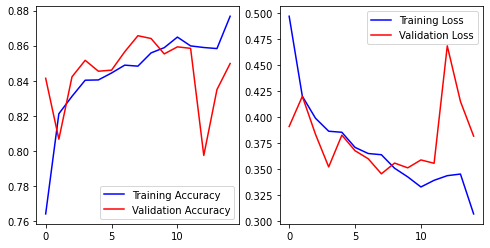

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
predictions = classifier.predict(X_test)

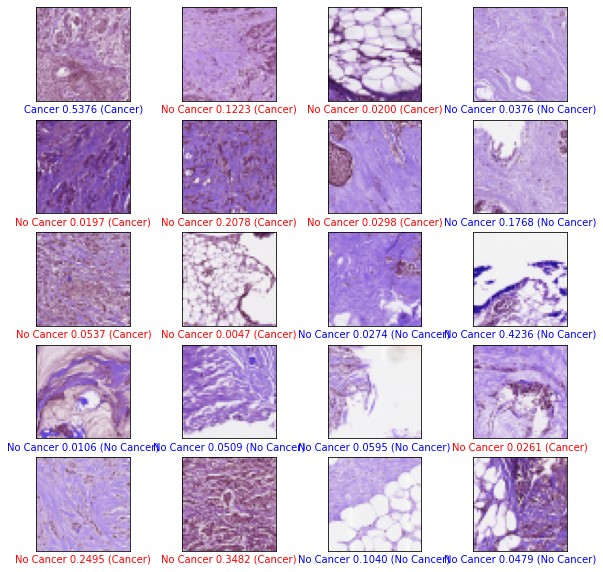

In [ ]:
plt.figure(figsize=(10,10))
for index_image in range(20):
  plt.subplot(5, 4, index_image+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_val[index_image])
  predicted_label = "No Cancer" if predictions[index_image]<0.5 else "Cancer"
  real_label="No Cancer" if Y_val[index_image]==0 else "Cancer"
  color= 'blue' if predicted_label == real_label else 'red'
  plt.xlabel(f'{predicted_label} {np.max(predictions[index_image]):.4f} ({real_label})', color=color)

In [ ]:
predictions_label=[(0 if element<0.5 else 1) for element in predictions]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions_label)

In [ ]:
classes = np.unique(Y_val)
classes

array([0, 1])

In [ ]:
accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
print(accuracy, misclass)

0.8860119047619047 0.11398809523809528


In [ ]:
cm

array([[2259,   95],
       [ 288,  718]])

In [ ]:
def matrixConfusion(cm) :  
  plt.figure(figsize=(4,4))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['No-Cancer','Cancer']
  plt.title('Confusion Matrix')
  plt.ylabel('Clase real')
  plt.xlabel('Predicción')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),ha="center", va="center")
          plt.rcParams["axes.grid"] = False
  plt.show()

Comparacion con Modelo

# Comparación de Modelos : Modelo 1 

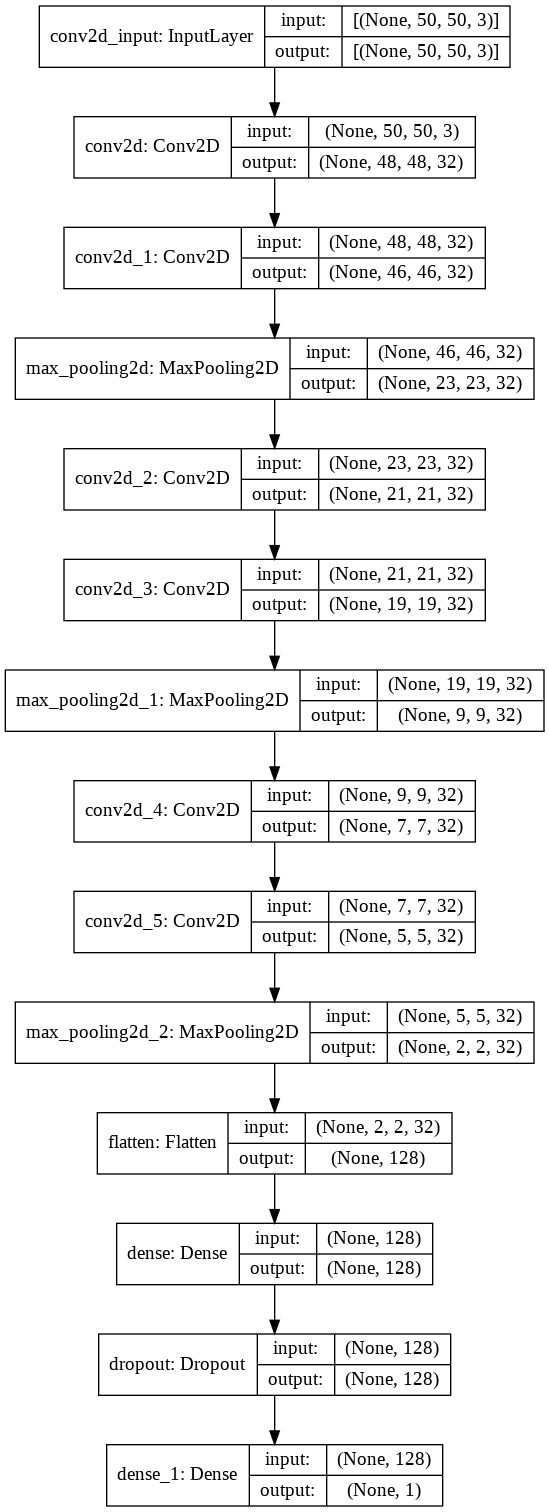

In [ ]:
modelo1= tf.keras.models.load_model('/content/drive/MyDrive/ModelosBuenos/Modelo1MejoradoPablo.h5')
keras.utils.plot_model(modelo1, show_shapes=True)

In [ ]:
modelo1.evaluate(X_test,Y_test)

105/105 [==============================] - 1s 6ms/step - loss: 0.3267 - accuracy: 0.8729 - mse: 0.0960


[0.3267490267753601, 0.8729166388511658, 0.0959504172205925]

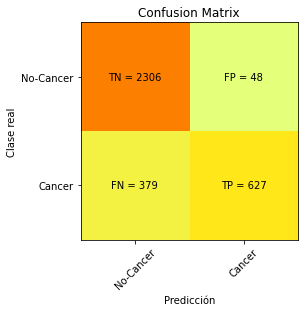

In [ ]:
from sklearn.metrics import confusion_matrix

predictions = modelo1.predict(X_test)
predictions_label=[(0 if element<0.5 else 1) for element in predictions]
cm = confusion_matrix(Y_test, predictions_label)
matrixConfusion(cm)

# Comparación de Modelos : Modelo 2


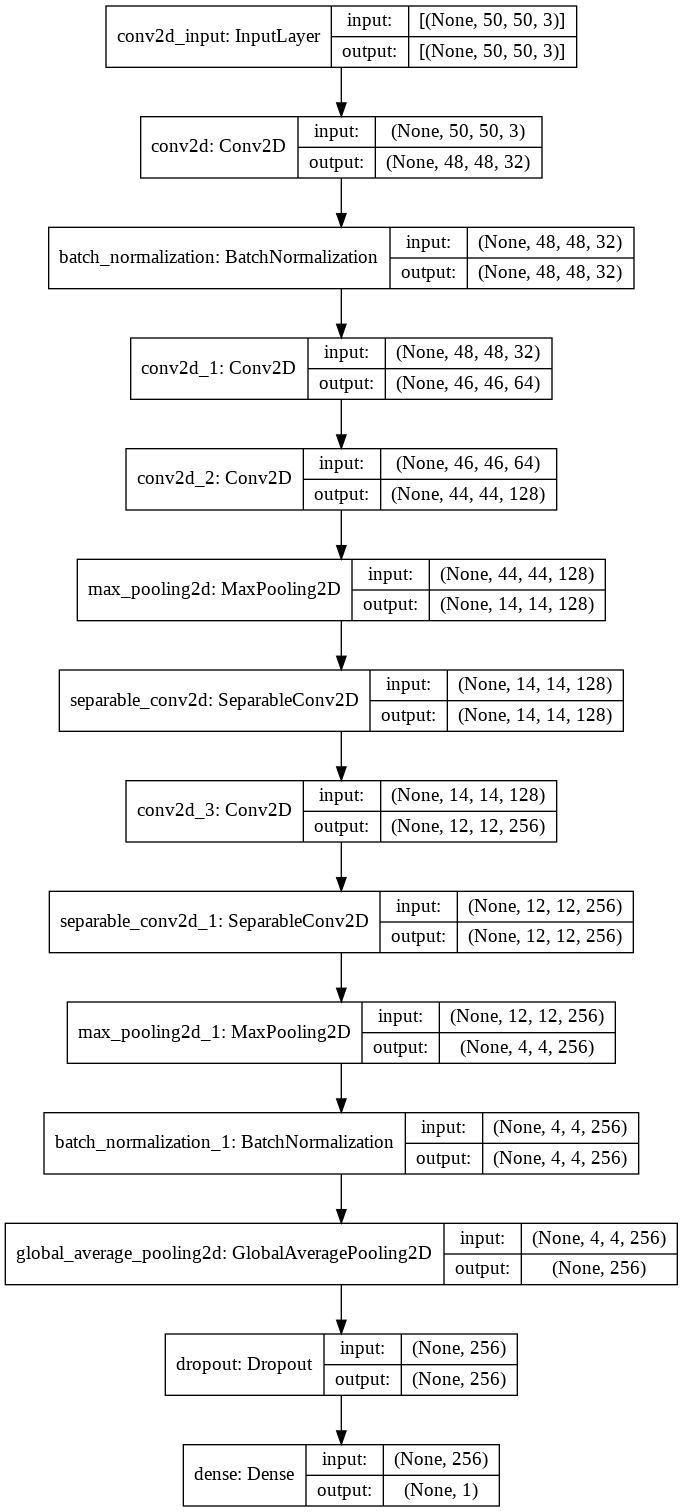

In [ ]:
modelo2= tf.keras.models.load_model('/content/drive/MyDrive/ModelosBuenos/modelcancerSierra.h5')
keras.utils.plot_model(modelo2, show_shapes=True)

In [ ]:
modelo2.evaluate(X_test,Y_test)

105/105 [==============================] - 2s 12ms/step - loss: 0.3671 - accuracy: 0.8815 - mse: 0.0957


[0.3671139180660248, 0.8815476298332214, 0.09574364870786667]

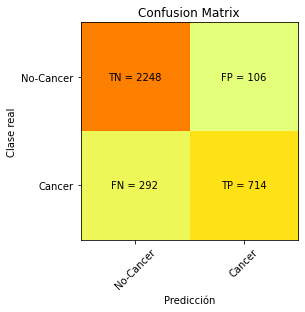

In [ ]:

predictions = modelo2.predict(X_test)
predictions_label=[(0 if element<0.5 else 1) for element in predictions]
cm = confusion_matrix(Y_test, predictions_label)
matrixConfusion(cm)

# Comparación de Modelos : Modelo 3


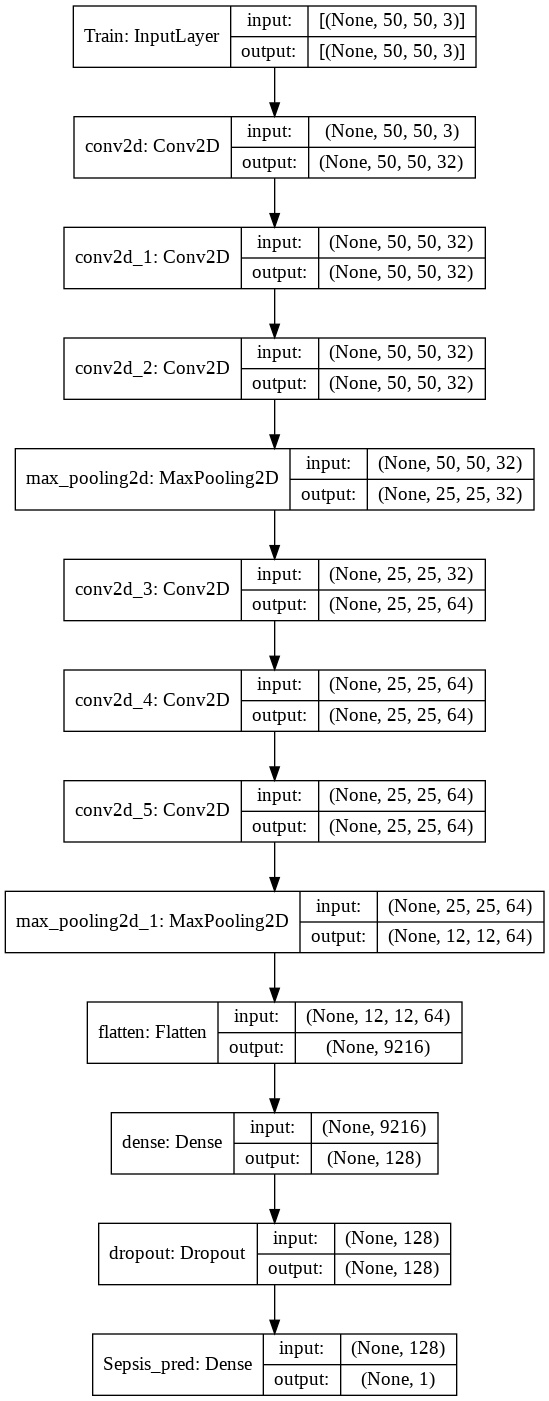

In [ ]:
modelo3= tf.keras.models.load_model('/content/drive/MyDrive/ModelosBuenos/ModeloPino1.h5')
keras.utils.plot_model(modelo3, show_shapes=True)

In [ ]:
modelo3.evaluate(X_test,Y_test)

105/105 [==============================] - 1s 10ms/step - loss: 0.5319 - accuracy: 0.8958 - mse: 0.0884


[0.5318577885627747, 0.8958333134651184, 0.08840444684028625]

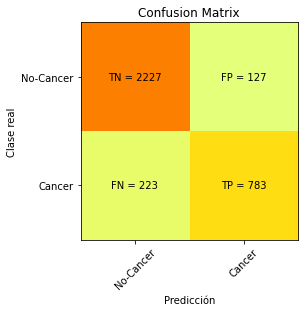

In [ ]:

predictions = modelo3.predict(X_test)
predictions_label=[(0 if element<0.5 else 1) for element in predictions]
cm = confusion_matrix(Y_test, predictions_label)
matrixConfusion(cm)

# Comparación de Modelos : Modelo 4


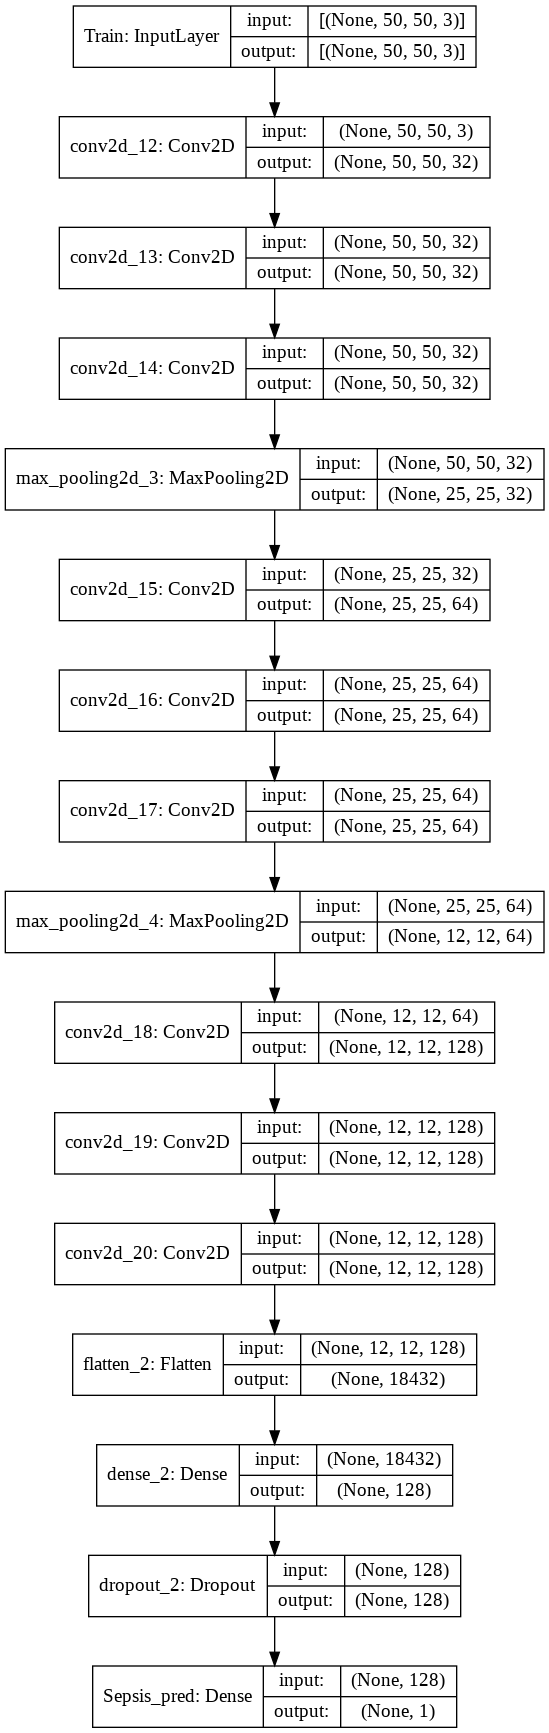

In [ ]:
modelo4= tf.keras.models.load_model('/content/drive/MyDrive/ModelosBuenos/ModeloPino_2.h5')
keras.utils.plot_model(modelo4, show_shapes=True)

In [ ]:
modelo4.evaluate(X_test,Y_test)

105/105 [==============================] - 2s 12ms/step - loss: 0.3863 - accuracy: 0.8670 - mse: 0.1067


[0.38625457882881165, 0.8669642806053162, 0.10666811466217041]

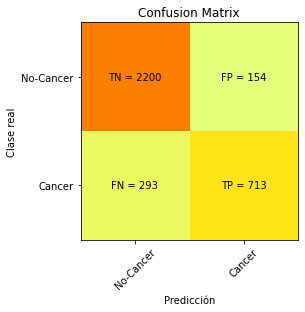

In [ ]:

predictions = modelo4.predict(X_test)
predictions_label=[(0 if element<0.5 else 1) for element in predictions]
cm = confusion_matrix(Y_test, predictions_label)
matrixConfusion(cm)

# Comparación de Modelos : Modelo 5


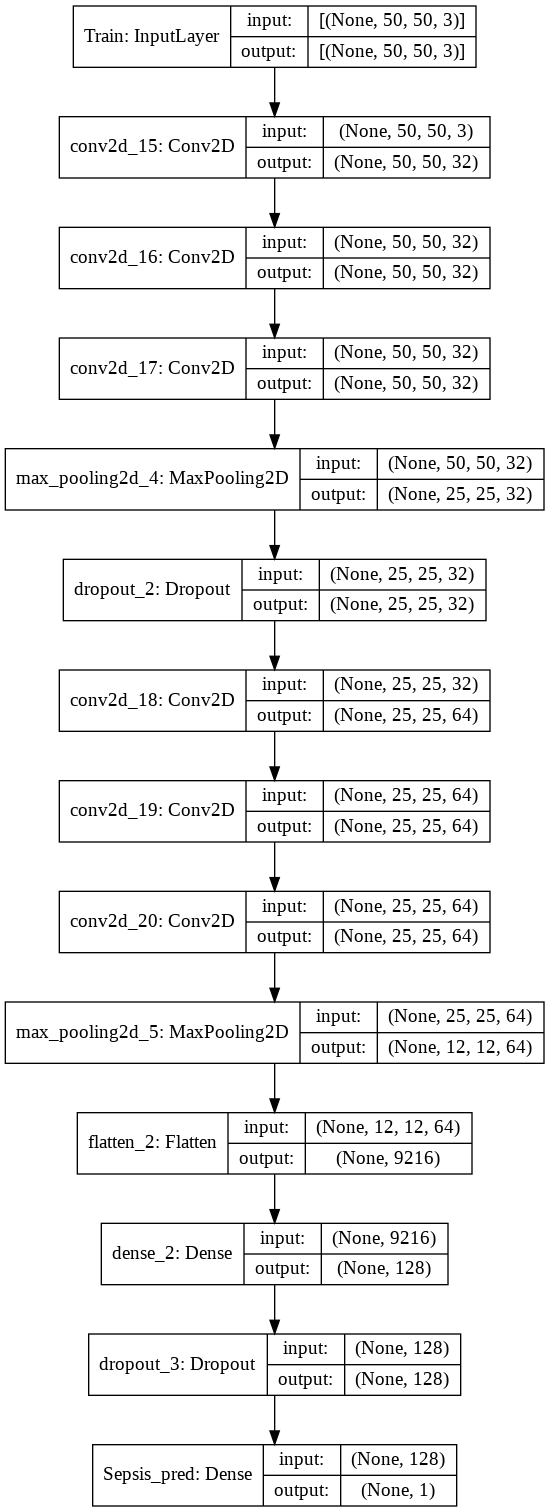

In [ ]:
modelo5= tf.keras.models.load_model('/content/drive/MyDrive/ModelosBuenos/ModeloPino_3.h5')
keras.utils.plot_model(modelo5, show_shapes=True)

In [ ]:
modelo5.evaluate(X_test,Y_test)

105/105 [==============================] - 1s 10ms/step - loss: 0.2511 - accuracy: 0.9080 - mse: 0.0715


[0.2511439621448517, 0.9080356955528259, 0.07152290642261505]

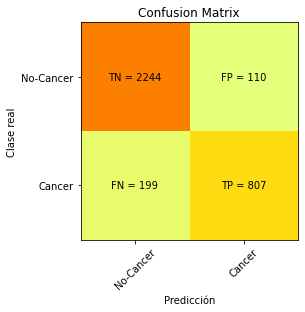

In [ ]:
predictions = modelo5.predict(X_test)
predictions_label=[(0 if element<0.5 else 1) for element in predictions]
cm = confusion_matrix(Y_test, predictions_label)
matrixConfusion(cm)

# Comparación con modelos : VGG16

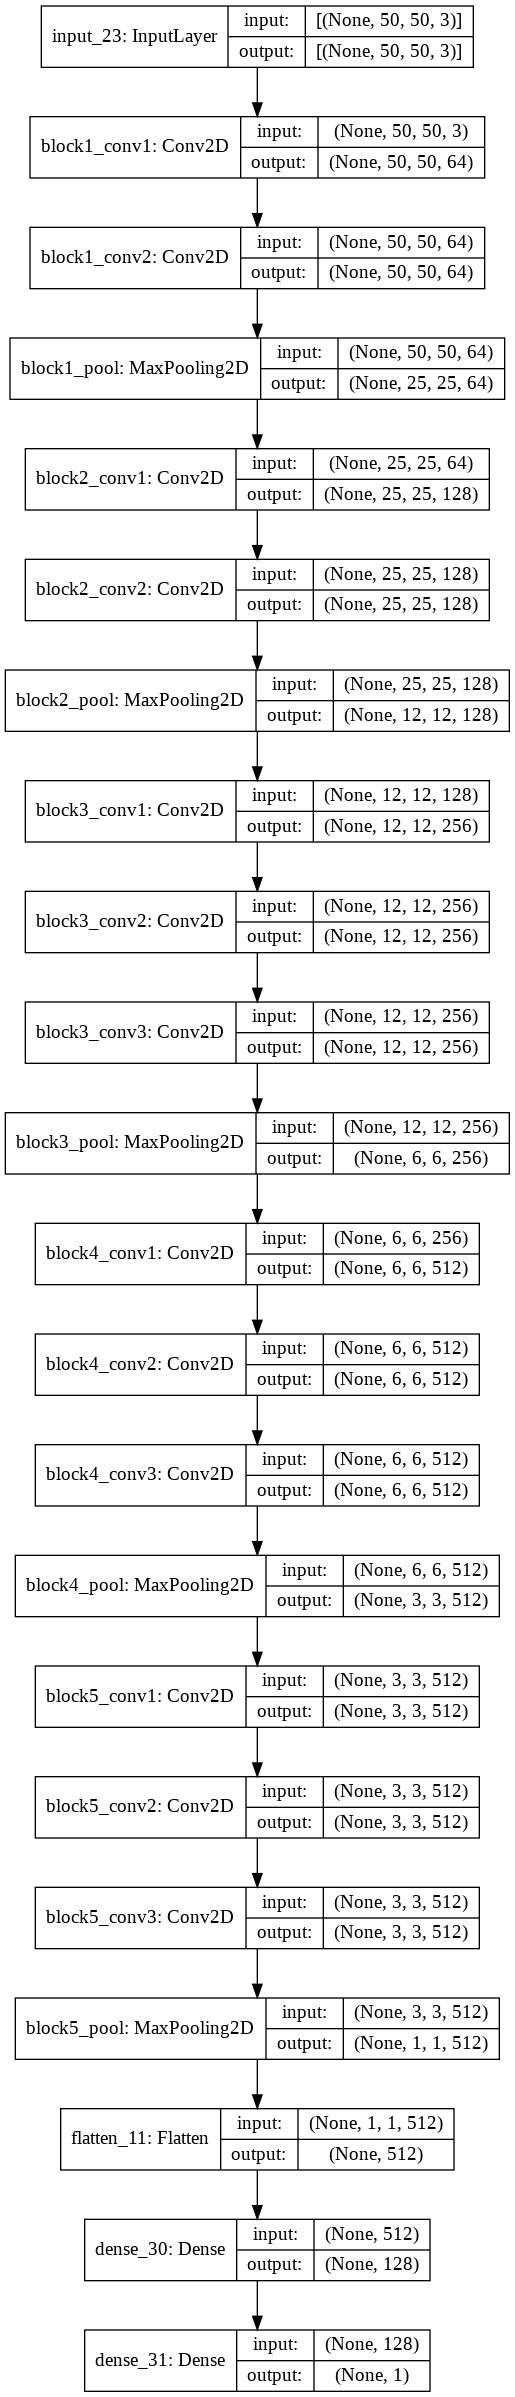

In [ ]:
vgg16= tf.keras.models.load_model('/content/drive/MyDrive/ModelosBuenos/vgg16model.h5')
keras.utils.plot_model(vgg16, show_shapes=True)

In [ ]:
vgg16.evaluate(X_test,Y_test)

105/105 [==============================] - 91s 865ms/step - loss: 0.3661 - accuracy: 0.8503


[0.36607420444488525, 0.8502976298332214]

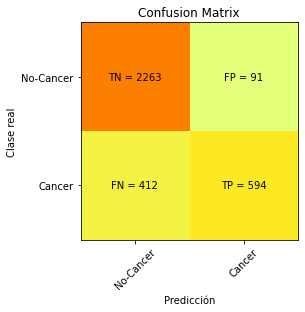

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = modelo5.predict(X_test)
predictions_label=[(0 if element<0.5 else 1) for element in predictions]
cm = confusion_matrix(Y_test, predictions_label)
matrixConfusion(cm)

# Comparación con modelos: VGG19


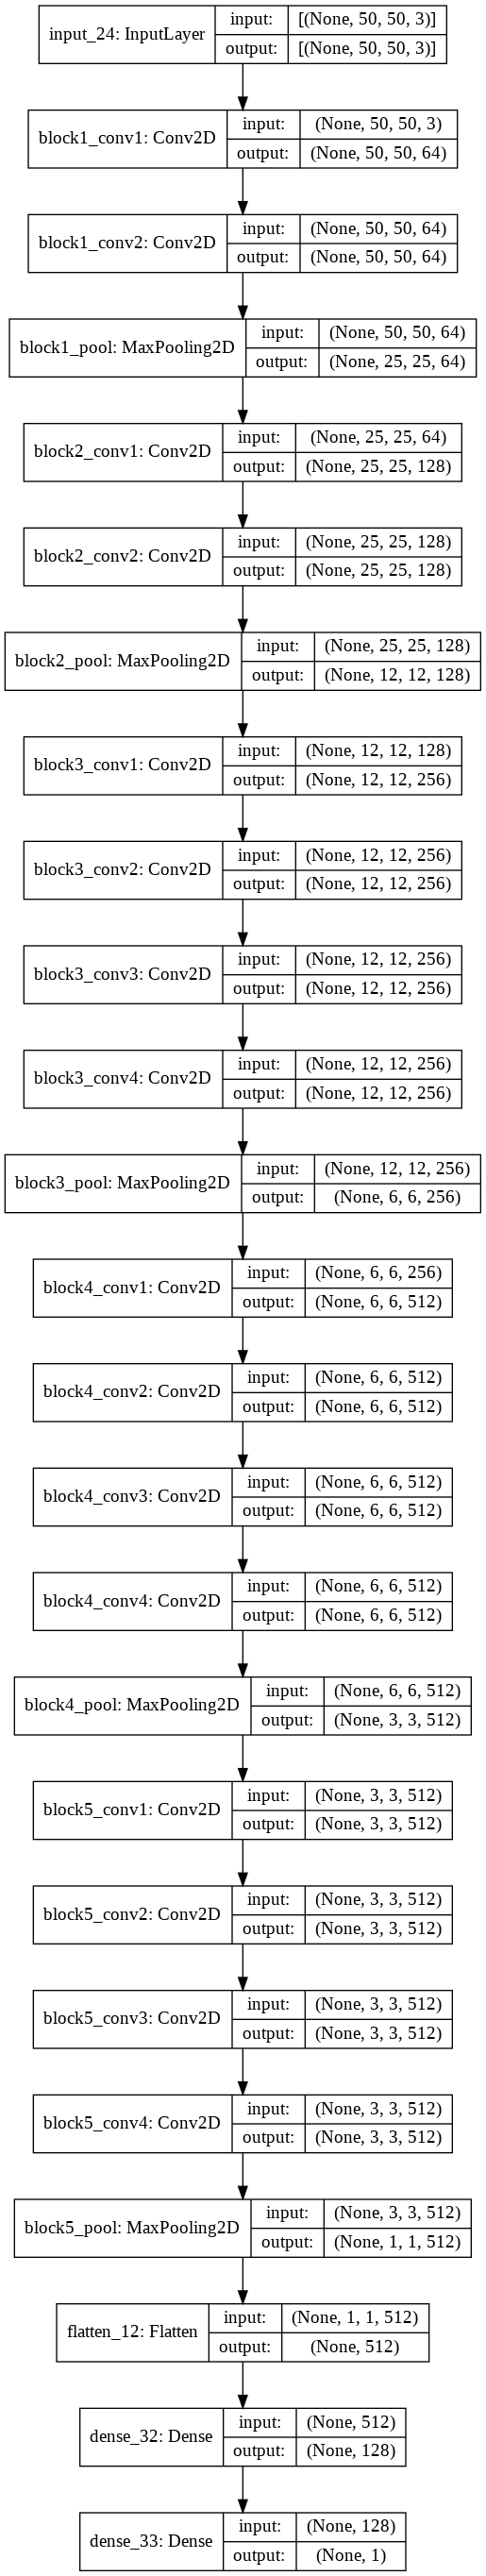

In [ ]:
vgg19= tf.keras.models.load_model('/content/drive/MyDrive/ModelosBuenos/vgg19model.h5')
keras.utils.plot_model(vgg19, show_shapes=True)

In [ ]:
vgg19.evaluate(X_test,Y_test)

105/105 [==============================] - 115s 1s/step - loss: 0.3874 - accuracy: 0.8461


[0.3873903155326843, 0.8461309671401978]

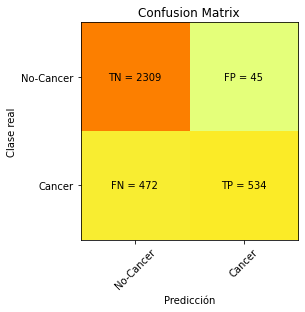

In [ ]:
predictions = vgg19.predict(X_test)
predictions_label=[(0 if element<0.5 else 1) for element in predictions]
cm = confusion_matrix(Y_test, predictions_label)
matrixConfusion(cm)

#Comparacion VGG16-KNN

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [ ]:
modelVgg16_knn = VGG16(include_top=False,input_shape=(50,50,3))
x = modelVgg16_knn.output
x = Flatten()(x)
modelVgg16_knn = Model(inputs=modelVgg16_knn.input, outputs=x)
keras.utils.plot_model(modelVgg16_knn, show_shapes=True)

In [ ]:
train = modelVgg16_knn.predict(X_train)

In [ ]:
X_train_N,X_test_N,Y_train_N,Y_test_N = train_test_split(train,Y_train, test_size=0.2, random_state=7, stratify=Y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn= GridSearchCV(knn,param_grid,cv=10)
knn.fit(X_train_N,Y_train_N)

In [ ]:
knn.score(X_test_N,Y_test_N)

In [ ]:
predictions = knn.predict(X_test_N)
predictions_label=[(0 if element<0.5 else 1) for element in predictions]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions_label)
matrixConfusion(cm)

In [ ]:
predictions_label=[(0 if element<0.5 else 1) for element in predictions]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions_label)

In [ ]:
matrixConfusion(cm)

#Comparacion VGG16-Tree

In [ ]:
modelVgg16_tree = VGG16(include_top=False,input_shape=(50,50,3))
x = modelVgg16_tree.output
x = Flatten()(x)
modelVgg16_tree = Model(inputs=modelVgg16_tree.input, outputs=x)
keras.utils.plot_model(modelVgg16_tree, show_shapes=True)

In [ ]:
train = modelVgg16_tree.predict(X_train)

In [ ]:
X_train_N,X_test_N,Y_train_N,Y_test_N = train_test_split(train,Y_train, test_size=0.2, random_state=7, stratify=Y_train)

In [ ]:
from sklearn import tree

In [ ]:
tree = tree.DecisionTreeClassifier()
tree.fit(X_train_N,Y_train_N)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree.score(X_test_N,Y_test_N)

0.7011215906194239

#Comparacion VGG16-SVM

In [ ]:
modelVgg16_svm = VGG16(include_top=False,input_shape=(50,50,3))
x = modelVgg16_svm.output
x = Flatten()(x)
modelVgg16_svm = Model(inputs=modelVgg16_svm.input, outputs=x)
keras.utils.plot_model(modelVgg16_svm, show_shapes=True)

In [ ]:
train = modelVgg16_svm.predict(X_train)

In [ ]:
X_train_N,X_test_N,Y_train_N,Y_test_N = train_test_split(train,Y_train, test_size=0.2, random_state=7, stratify=Y_train)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm = SVR(kernel='poly',degree=2,C = 0.8)
svm.fit(X_train_N,Y_train_N)

In [ ]:
svm.score(X_test_N,Y_test_N)